# [Introduction to NumPy](https://www.datacamp.com/completed/statement-of-accomplishment/course/fc7e00aeafb360acc9c97a00d7dbd3731915cb79)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/introduction_to_numpy/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/introduction_to_numpy/notebook.ipynb)

_NumPy_ (**num**erical **py**thon) is the core library for scientific computing in Python. Foundational packages like `pandas`, `scipy`, and `matplotlib` are built on top of NumPy.

_Arrays_ are the primary data structure in NumPy. Unlike Python _lists_, NumPy arrays are homogeneous; that is, all elements of an array must be of the same type (usually numbers).

**Contents**
  * [Types](#types)
  * [Dimensionality](#dimensionality)
  * [Creating and Reshaping](#creating-and-reshaping)
  * [Indexing and Slicing](#indexing-and-slicing)
  * [Sorting](#sorting)
  * [Filtering](#filtering)
  * [Inserting and Deleting](#inserting-and-deleting)
  * [Summarizing](#summarizing)
  * [Vectorized Operations](#vectorized-operations)
  * [Broadcasting](#broadcasting)
  * [Flipping and Transposing](#flipping-and-transposing)
  * [Splitting and Stacking](#splitting-and-stacking)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

monthly_sales = np.load("monthly_sales.npy")
monthly_industry_multipliers = np.load("monthly_industry_multipliers.npy")
rgb_array = np.load("rgb.npy")
sudoku_game = np.load("sudoku_game.npy")
tree_census = np.load("tree_census.npy")


### Types

NumPy supports a much greater variety of numerical types than Python does. Types can be suffixed with `_` or a bit-width. Booleans are always `np.bool_` (always 8 bits or 1 byte). The default data type is `np.float_` (an alias for `np.float64`). Arrays are `np.ndarray` (n-dimensional array).

Bits (binary digits) are the smallest unit of data. A bit can be either 0 or 1. A byte is a sequence of 8 bits. A 64-bit integer can hold $2^{64}$ distinct values ranging from 0 to $2^{64} - 1$.

Integers can be signed (positive or negative) or unsigned (positive only). They can be 8, 16, 32, or 64 bits:
  * `np.int8 == np.byte`
  * `np.int16 == np.short`
  * `np.int32 == np.intc`
  * `np.int64 == np.intp == np.int_`
  * `np.uint8 == np.ubyte`
  * `np.uint16 == np.ushort`
  * `np.uint32 == np.uintc`
  * `np.uint64 == np.uintc == np.uint`

The `p` suffix indicates that it is large enough to hold a pointer.

Floats can be 16, 32, 64, or 128 bits:
  * `np.float16 == np.half`
  * `np.float32 == np.single`
  * `np.float64 == np.double == np.float_`
  * `np.float128 == np.longdouble == np.longfloat`

Using the smallest type necessary to store your data will reduce memory usage and speed up calculations.

In [2]:
# an array of ints
a = np.array([1, 2, 3])

# an array of floats
a = np.array([1.0, 2.0, 3.0])

# a single int changes bools to ints
a = np.array([True, False, 1])  # [1, 0, 1]

# a single float changes all ints to floats
a = np.array([1, 2, 3.0])  # [1., 2., 3.]

# a single string changes everything to strings
a = np.array([1, 2.0, False, "4"])  # ['1', '2.0', 'False', '4']

# coerce the type of an array at creation
a = np.array([1, 2, 3], dtype=np.float16)  # [1., 2., 3.]

# cast the type of an array after creation
a = np.zeros(3, dtype=np.int8).astype("<U32")  # ['0', '0', '0']

# the `dtype` attribute shows the type of the array elements
dtype = a.dtype  # <U32 (unicode string up to 32 characters)


### Dimensionality

The terms _vector_, _matrix_, and _tensor_ are used to refer to 1-, 2-, and n-dimensional arrays, respectively.

#### Vectors

A vector is a 1-dimensional array. It can be represented visually either vertically or horizontally.

$\mathbf{X} = \begin{bmatrix} x_1\\ x_2\\ \vdots\\ x_n\end{bmatrix}$

$\mathbf{X} = \begin{bmatrix} x_1 & x_2 & \ldots & x_n\end{bmatrix}$

In [3]:
# a vector of integers between 1 and 9
vector = np.arange(1, 10)
print(vector)


[1 2 3 4 5 6 7 8 9]


#### Matrices

A matrix is a 2-dimensional array. It can be represented visually as a grid.

$\mathbf{X} = \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1n}\\ x_{21} & x_{22} & \ldots & x_{2n}\\ \vdots & \vdots & \ddots & \vdots\\ x_{m1} & x_{m2} & \ldots & x_{mn}\end{bmatrix}$

In [4]:
# a 3x3 matrix of integers between 1 and 9
# (a list of 3 lists)
matrix = np.arange(1, 10).reshape((3, 3))
print(matrix)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Tensors

A tensor is an n-dimensional array.

$\mathbf{X} = \left[ \begin{bmatrix} x_{111} & x_{112} & \dots & x_{11P} \\ x_{121} & x_{122} & \dots & x_{12P} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1M1} & x_{1M2} & \dots & x_{1MP} \end{bmatrix}, \begin{bmatrix} x_{211} & x_{212} & \dots & x_{21P} \\ x_{221} & x_{222} & \dots & x_{22P} \\ \vdots & \vdots & \ddots & \vdots \\ x_{2M1} & x_{2M2} & \dots & x_{2MP} \end{bmatrix}, \dots, \begin{bmatrix} x_{N11} & x_{N12} & \dots & x_{N1P} \\ x_{N21} & x_{N22} & \dots & x_{N2P} \\ \vdots & \vdots & \ddots & \vdots \\ x_{NM1} & x_{NM2} & \dots & x_{NMP} \end{bmatrix} \right]$

In [5]:
# a 3x3x3 matrix of integers between 1 and 27
# (a list of 3 lists of 3 lists)
tensor = np.arange(1, 28).reshape((3, 3, 3))
print(tensor)


[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]


### Creating and Reshaping

In [6]:
# arrays can be created from lists
a = np.array([1, 2, 3])

# arrays can be multidimensional
a = np.array([[1, 2, 3], [4, 5, 6]])

# 2D array of zeros of shape (2, 3) (two rows of three columns)
a = np.zeros((2, 3))

# 2D array of random floats between 0 and 1
# NOTE: `np.random` is a module
a = np.random.random((2, 3))

# 2D array of random integers between 0 and 10 (high is exclusive)
a = np.random.randint(0, 10, (2, 3))

# 1D array-range of integers (stop is exclusive)
vector = np.arange(1, 10)

# reshape into a 2D matrix
matrix = vector.reshape((3, 3))

# flatten a matrix back into a 1D vector
vector = matrix.flatten()

# get the shape of an array
shape = matrix.shape  # (3, 3)

# get the size of an array (all elements combined)
size = matrix.size  # 9

# get the number of dimensions of an array
ndim = matrix.ndim  # 2

# get the length across the last axis
length = matrix.shape[matrix.ndim - 1]  # 3 (the last axis of a 2D array is 1)

# get the length across the last axis (same as above)
length = matrix.shape[-1]  # 3

# get the length across the first axis
length = matrix.shape[0]  # 3

# get the length of a 1D array
length = vector.shape[vector.ndim - 1]  # 9 (a 1D array only has 1 axis)

# get the length of a 1D array (same as above)
length = vector.shape[0]  # 9

# get the length of a 1D array (same as above)
length = vector.size  # 9


### Indexing and Slicing

In [7]:
print(sudoku_game)


[[0 0 4 3 0 0 2 0 9]
 [0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]


In [8]:
# get the first row
row = sudoku_game[0]  # [0 0 4 3 0 0 2 0 9]

# get the last column
col = sudoku_game[:, -1]  # [9 1 3 7 0 0 5 0 0]

# get the last column using ellipsis
# (`...` is equivalent to `:` for the remaining axes; useful for many dimensions)
col = sudoku_game[..., -1]  # [9 1 3 7 0 0 5 0 0]

# get a slice of rows (stop is exclusive)
slice = sudoku_game[1:4]  # rows 2-4

# get a slice of columns (stop is exclusive)
slice = sudoku_game[:, 1:4]  # columns 2-4

# get the second, fourth, and sixth rows (step of 2)
rows = sudoku_game[1:7:2]


### Sorting

NumPy arrays can be sorted on a particular axis using `np.sort()`. The default axis is `-1` (last axis).

A 1D array has only one axis. A 2D array defaults to sorting _across_ columns (`axis=1`). To sort _down_ rows use `axis=0`.

To reverse sort use `np.sort(my_arr)[::-1]`.

In [9]:
# 2D array sorts across columns (axis=1) by default
print(np.sort(sudoku_game))


[[0 0 0 0 0 2 3 4 9]
 [0 0 0 0 0 0 1 5 9]
 [0 0 0 0 0 3 4 6 7]
 [0 0 0 0 0 2 6 7 8]
 [0 0 0 0 0 1 4 7 9]
 [0 0 0 0 0 0 3 5 8]
 [0 0 0 0 0 0 1 5 6]
 [0 0 0 0 3 5 6 8 9]
 [0 0 0 0 1 2 3 4 9]]


In [10]:
# sort down rows (axis=0)
print(np.sort(sudoku_game, axis=0))


[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 2 1 0 1]
 [0 4 3 0 0 3 2 0 3]
 [0 5 4 3 1 7 3 4 5]
 [1 7 5 5 6 8 4 8 7]
 [6 9 6 9 8 9 6 9 9]]


In [11]:
# reverse sort 1D array (first row)
print(np.sort(sudoku_game[0])[::-1])


[9 4 3 2 0 0 0 0 0]


### Filtering

The two main ways to _filter_ arrays are by _fancy indexing_ and by function.

Fancy indexing simply means indexing with another array instead of a scalar value. You can index with an array of integers corresponding to the indices you want to select, or you can index with an array of booleans corresponding to the elements you want to select. A boolean array used like this is called a _mask_.

In [12]:
# using pandas to print a nice table
pd.DataFrame(
    tree_census,
    columns=["tree_id", "block_id", "trunk_diameter", "stump_diameter"],
).head()


,tree_id,block_id,trunk_diameter,stump_diameter
0,3,501451,24,0
1,4,501451,20,0
2,7,501911,3,0
3,8,501911,3,0
4,9,501911,4,0


In [13]:
# get a 1D array of all block IDs (all rows, second column)
block_ids = tree_census[:, 1]

# get the first 100 trunk diameters (stop is exclusive)
hundred_diameters = tree_census[:100, 2]

# get every other trunk diameter from 50 to 100 (even indices)
every_other_diamater = tree_census[50:101:2, 2]

# get a sorted list of trunk diameters (ascending)
sorted_diameters = np.sort(tree_census[:, 2])

# get a subset of the array where the trunk diameter is the largest using a mask
# (returns a 2D array with multiple rows if there are ties)
largest_tree_mask = tree_census[:, 2] == sorted_diameters[-1]
largest_tree = tree_census[largest_tree_mask]

# similar to above using `argmax` (returns the index of the largest value)
# (returns a 1D array corresponding to 1 row)
largest_tree = tree_census[np.argmax(tree_census[:, 2])]

# get a subset of rows with block ID of `313879` using a mask
block_id_mask = tree_census[:, 1] == 313879
block_313879 = tree_census[block_id_mask]

# get a subset of rows with block ID of `313879` using `where` (same output as above)
block_313879 = tree_census[np.where(tree_census[:, 1] == 313879)]


### Inserting and Deleting

In [14]:
new_trees = np.array([[1211, 227386, 20, 0], [1212, 227386, 8, 0]])

# create a 1D array of trunk diameters replacing 0s with stump diameter
trunk_stump_diameters = np.where(
    tree_census[:, 2] == 0,
    tree_census[:, 3],  # value if true (stump diameter)
    tree_census[:, 2],  # value if false (trunk diameter)
)

# add the new trees to the tree census (using concatenate)
# (default axis is 0)
updated_tree_census = np.concatenate((tree_census, new_trees))

# add the new trees to the tree census (using vstack)
updated_tree_census = np.vstack((tree_census, new_trees))

# reshape trunk_stump_diameters so it can be added as the last column in tree_census
# (turn a vector into a matrix with 5 rows and 1 column)
reshaped_diameters = trunk_stump_diameters.reshape((tree_census.shape[0], 1))

# add the reshaped column to the tree census
# (remember that with `axis=0` we appended rows, so we want `axis=1` to append columns)
concatenated_tree_census = np.concatenate((tree_census, reshaped_diameters), axis=1)

# add the reshaped column to the tree census (using hstack)
concatenated_tree_census = np.hstack((tree_census, reshaped_diameters))

# delete the stump diameter column
tree_census_no_stumps = np.delete(tree_census, 3, axis=1)

# get the indices of block 313879 (a "private" block)
private_block_indices = np.where(tree_census[:, 1] == 313879)

# delete the rows with block 313879
tree_census_clean = np.delete(tree_census_no_stumps, private_block_indices, axis=0)


### Summarizing

NumPy provides a number of methods for aggregating data in arrays to generate summary statistics.

In [15]:
pd.DataFrame(
    monthly_sales,
    columns=["liquor_stores", "restaurants", "department_stores"],
    index=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
)


,liquor_stores,restaurants,department_stores
JAN,4134,23925,8657
FEB,4116,23875,9142
MAR,4673,27197,10645
APR,4580,25637,10456
MAY,5109,27995,11299
JUN,5011,27419,10625
JUL,5245,27305,10630
AUG,5270,27760,11550
SEP,4680,24988,9762
OCT,4913,25802,10456


In [16]:
# create a 2D array of total monthly sales (across stores)
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims=True)

# same as above using `np.newaxis`
monthly_industry_sales = monthly_sales.sum(axis=1)[:, np.newaxis]

# add to monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis=1)


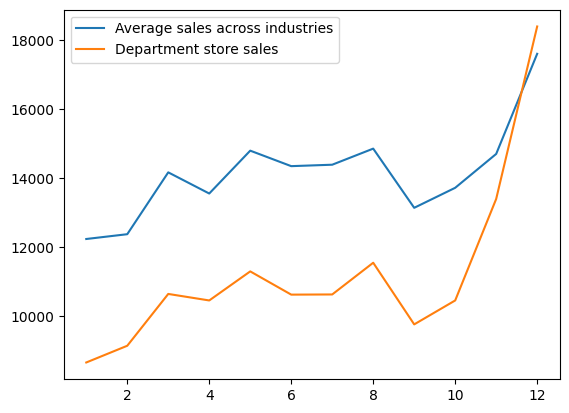

In [17]:
# create a 1D array of average monthly sales (across stores)
avg_monthly_sales = monthly_sales.mean(axis=1)

# numbers corresponding to months
months = np.arange(1, 13)

# plot average monthly sales by month
plt.plot(
    months,  # x-axis
    avg_monthly_sales,  # y-axis
    label="Average sales across industries",
)

# plot department store sales by month
plt.plot(months, monthly_sales[:, 2], label="Department store sales")
plt.legend()
plt.show()


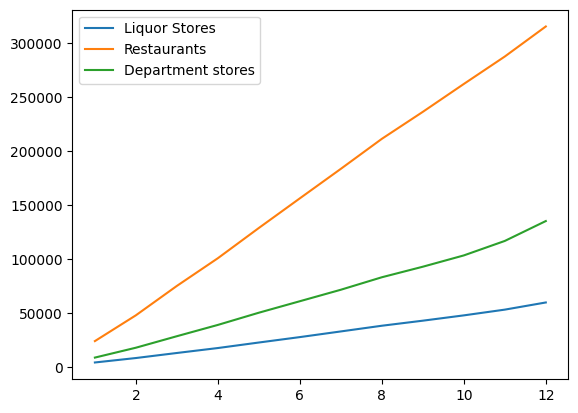

In [18]:
# get cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)

# numbers corresponding to months
months = np.arange(1, 13)

# plot each industry's cumsum by month as separate lines
plt.plot(
    months,
    cumulative_monthly_industry_sales[:, 0],
    label="Liquor Stores",
)
plt.plot(
    months,
    cumulative_monthly_industry_sales[:, 1],
    label="Restaurants",
)
plt.plot(
    months,
    cumulative_monthly_industry_sales[:, 2],
    label="Department stores",
)
plt.legend()
plt.show()


### Vectorized Operations

Array operations in NumPy are _element-wise_ and _vectorized_, which means they are applied to each element in the array without explicit looping.

In linear algebra, element-wise refers to operations that are performed on each corresponding element of two arrays. For example, the element-wise sum of two vectors **X** and **Y** is:

$\mathbf{X} + \mathbf{Y} = \begin{bmatrix} x_1 + y_1\\ x_2 + y_2\\ \vdots\\ x_n + y_n\end{bmatrix}$

When working with arrays, it's common to loop over each item in the array, perform some operation, and store the result in a new array. NumPy allows you to apply any operation across an entire array automatically. The iterating that does happen is done at a lower-level, in C, which is much faster than iterating in Python. This is because NumPy itself is mostly written in C. Since NumPy arrays are homogenous, there's no need to check the type of each element before performing an operation on it. This also means that the array can be stored as a single, contiguous block of memory, which makes data retrieval and manipulation much faster. In a nutshell, NumPy allows you to write developer-friendly Python code that is extremely fast and memory-efficient when working with arrays.

For functions that are not vectorized, you can use `np.vectorize()` to vectorize them.

In [19]:
# a 2x3 array of first and last names (wide format)
names = np.array([["Izzy", "Monica", "Marvin"], ["Weber", "Patel", "Hernandez"]])
print(np.vectorize(str.upper)(names))


[['IZZY' 'MONICA' 'MARVIN']
 ['WEBER' 'PATEL' 'HERNANDEZ']]


In [20]:
# create a 2D array of tax collected by industry and month
tax_collected = monthly_sales * 0.05

# create another array with the combined total
total_tax_and_revenue = monthly_sales + tax_collected


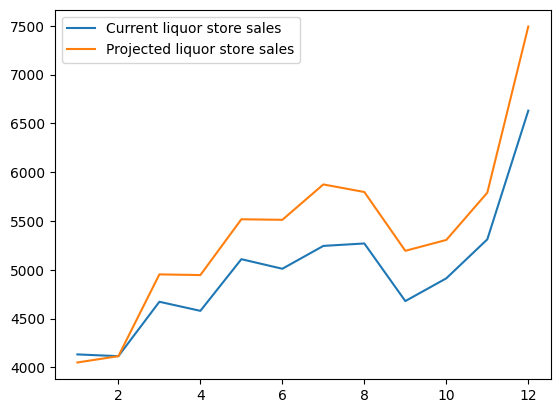

In [21]:
# create an array of projected sales
projected_monthly_sales = monthly_sales * monthly_industry_multipliers

# numbers corresponding to months
months = np.arange(1, 13)

# plot liquor store sales and projected sales by month
plt.plot(
    months,
    monthly_sales[:, 0],
    label="Current liquor store sales",
)
plt.plot(
    months,
    projected_monthly_sales[:, 0],
    label="Projected liquor store sales",
)
plt.legend()
plt.show()


### Broadcasting

_Broadcasting_ is a fundamental concept in NumPy. When operations between 2 arrays of different shapes are performed, NumPy will _broadcast_ the smaller array across the larger array so that they have compatible shapes. NumPy also does this in a way without creating a new, intermediate array in memory.

For example, when you multiply each element of an array by a scalar like 2, NumPy is broadcasting an array of `[2]` across the original array.

Not all arrays are compatible for broadcasting. Two arrays are compatible for broadcasting if, for each _trailing dimension_ (i.e. the dimensions that come after the first dimension), the corresponding axis lengths are equal or one of them is 1. NumPy will raise a `ValueError` if the arrays are not compatible.

For example, a 2D array of shape `(3,2)` **is** compatible with a 1D array of shape `(2,)`, but **is not** compatible with a 1D array of shape `(3,)`.

When arrays have different dimensions, NumPy _prepends_ a `1` to the smaller array's shape until the number of dimensions match. Then the trailing dimensions can be compared. In the case of a `(2,)` array, it becomes `(1,2)` and is compatible with the `(3,2)` array because `3` and `1` are compatible and `2` and `2` are compatible. In contrast, a `(3,)` array becomes `(1,3)` and is not compatible with the `(3,2)` array because `3 != 2`.

By default, NumPy assumes you want to broadcast _row-wise_. If you want to broadcast _column-wise_, you need to reshape the smaller array manually first.

In [22]:
monthly_growth_1D = np.array(
    [1.01, 1.03, 1.03, 1.02, 1.05, 1.03, 1.06, 1.04, 1.03, 1.04, 1.02, 1.01]
)

# reshape to 2D column
monthly_growth_2D = monthly_growth_1D.reshape(
    (-1, 1)
)  # -1 means "infer the length for this dimension"

# get the mean industry multiplier
mean_multipliers = monthly_industry_multipliers.mean(axis=0)  # down rows; default axis is `None`

# multiply each value by the multiplier for that industry
projected_sales = monthly_sales * mean_multipliers


### Flipping and Transposing

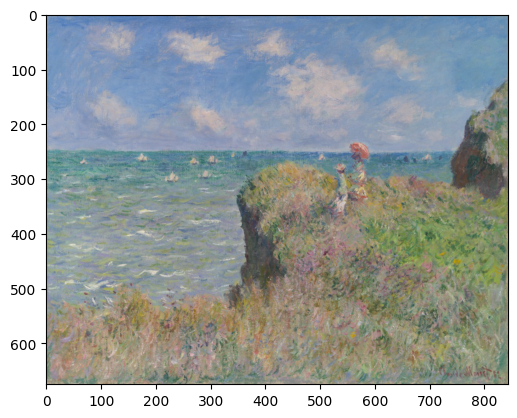

In [23]:
# Cliff Walk at Pourville, Claude Monet, 1882
plt.imshow(rgb_array)
plt.show()


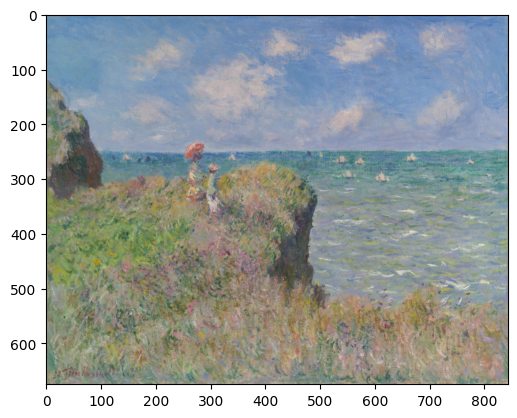

In [24]:
# flipped across the x-axis (mirror)
plt.imshow(np.flip(rgb_array, axis=1))
plt.show()


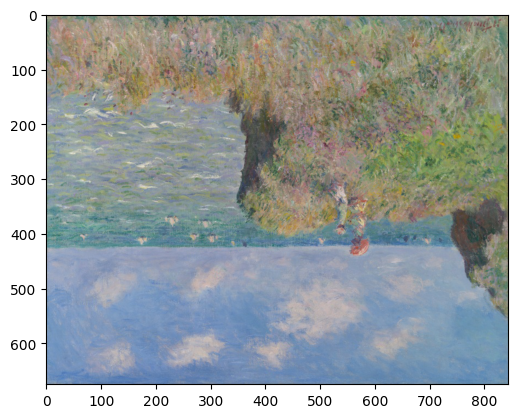

In [25]:
# flipped across the y-axis (upside down)
plt.imshow(np.flip(rgb_array, axis=0))
plt.show()


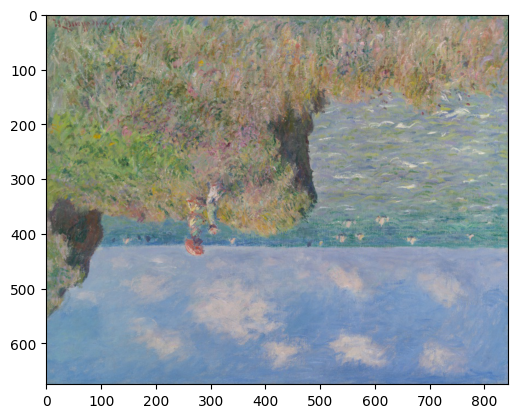

In [26]:
# flipped across both axes (rotated 180 degrees)
plt.imshow(np.flip(rgb_array, axis=(0, 1)))
plt.show()


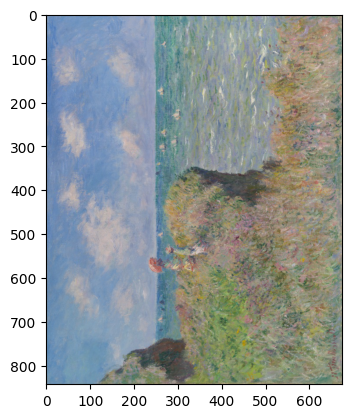

In [27]:
# transposed 90 degrees counter-clockwise and mirrored
plt.imshow(np.transpose(rgb_array, axes=(1, 0, 2)))
plt.show()


### Splitting and Stacking

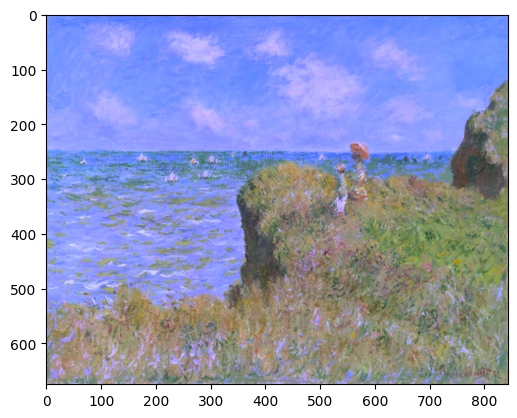

In [28]:
# split monthly sales into quarterly arrays
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales, 4)

# stack the quarterly arrays into a 2D array
quarterly_sales = np.stack(
    # default axis is 0 (vertical)
    (q1_sales, q2_sales, q3_sales, q4_sales),
)

# split rgb into red, green, and blue arrays
red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

# conditionally emphasize blue values by making them 255 if they are higher than the overall mean of `blue_array`
emphasized_blue_array = np.where(
    blue_array > blue_array.mean(),
    255,
    blue_array,
)

# remove the trailing dimension using `reshape`
emphasized_blue_array_2D = emphasized_blue_array.reshape(
    emphasized_blue_array.shape[0],
    emphasized_blue_array.shape[1],
)

# remove the trailing dimension using `squeeze`
red_array_2D = np.squeeze(red_array)
green_array_2D = np.squeeze(green_array)

# stack the 2D arrays into a 3D array
# NOTE: the shape for matplotlib image arrays is (height, width, channels)
emphasized_blue_monet = np.stack((red_array_2D, green_array_2D, emphasized_blue_array_2D), axis=2)

# plot the emphasized monet
plt.imshow(emphasized_blue_monet)
plt.show()
